#  Exam I0U19A - Management of Large-Scale Omics Data

June 2024

**Note:** 

* The exam is open book and open internet. However the **use of any communication tool (phone, chat, mail, etc) is strictly forbidden!**
* You are allowed to use Github during the exam - but do not post any comments.
* You may use your phone ONLY for authentication purposes (to access toledo & the vcs)
* For all questions - even if you cannot finish the question - please provide comments describing what you are plannning to do

Exam will be evaluated based on this notebook & accompanying files uploaded to the Toledo Assignment. You will be expected to upload the following files:

* The exam ipython notebook (`exam_I0U19A_June_2024.ipynb`) with your answers. (download using `Jupyter menu / File / Download`)
* An HTML copy of above notebook (download using `Internet Browser menu / File / Save page as`)
* Your new Snakemake file (`Snakefile`)
* In general - **Make sure the plots you make are visible in this notebook before uploading to Toledo**
   
Please zip all files into one file with your r-number in the name: `rnumber.zip` - Note - Toledo does not allow the upload of .html files - so you must create an archive!

**Note:** you will also be graded not only on the outcome of these exercises, but also on a number of criteria discussed during class, such as: writing resilient code; by running (simple) sanity checks; by properly documenting your code and decent visualizations.

#### Preparation

**Make sure you work on your exam in a dedicted work folder**

Prior to starting the exam make sure you create a work folder:

```
mkdir -p $VSC_DATA/large_omics_exam_2024
cd $VSC_DATA/large_omics_exam_2024
```

**Data required**

Copy the data files to your work folder:

```
cd  $VSC_DATA/large_omics_exam_2024
cp -r /staging/leuven/stg_00079/teaching/exam_June_2024/* .
```

Among these files you will find the ipython exam notebook (`exam_I0U19A_June_2024.ipynb`). Continue working there.


**Terminal/Conda**

Do your (CPU intensive) command line work in a VSC interactive session. Please do not take too many scores or memory. This command was sufficient for me:

```
srun -n 1 -c 2 --mem 4G --time=7:00:00 -A lp_edu_large_omics -p interactive --cluster wice --pty bash -l
```

For **all** command line work (including snakemake) - make sure you use the correct conda environment by running the following in your shell:

    export PATH=/lustre1/project/stg_00079/teaching/I0U19a_conda_2024/bin/:$PATH
    
You can check if you have the correct kernel loaded by running:

    which python
    
Which should yield `/lustre1/project/stg_00079/teaching/I0U19a_conda_2024/bin/python`


**Jupyter**

Ondemand settings (as used in class):

* cluster: Wice
* Account: lp_edu_large_omics
* Partition: Batch
* Number of hours: Duration of the exam +1hr
* Number of cores: 1
* Required memory per core: 3000 
* Number of nodes: 1
* Number of GPU's: 0

Ensure you use the correct kernel for the jupyter work! You can confirm you have the correct kernel by running (in python):

    import sys
    sys.executable
    
Which should yield `/lustre1/project/stg_00079/teaching/I0U19a_conda_2024/bin/python`

If not, please check the Toledo posts.

---

**After copying the data to your work folder, you will find a notebook called `exam_I0U19A_June_2024.ipynb` in the `$VSC_DATA/large_omics_exam_2024` folder - continue your work there.**

---

**Best of luck,**
Mark

---

In [1]:
# check your kernel
import sys
sys.executable

'/lustre1/project/stg_00079/teaching/I0U19a_conda_2024/bin/python'

### Imports

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import vcfpy

---

# Question 1 - Snakemake

In your exam folder you wil a snakemake folder containing the workflow definition (`snakemake/Snakefile`) and the tumor/control fastq data. This Snakefile is the same Snakefile we created during the course. The workflow has not been executed yet.

The objective of this question is to expand the Snakemake file to further annotate the final snpEFF annotated VCF file using PhastCons conservation scores.

snpEff as a tool is powerful - but only predicts coding effects. We are also potentially interested in non-coding SNPs. One method to identify potentially interesting non-coding SNPs is by looking at conservation. Regions that are evolutionary conserved are more likely to have a function. So non-coding SNPs in conserved regions are of more interest. We will be using [Phast/PhastCons](http://compgen.cshl.edu/phast/) to find such SNPs.

I already downloaded the database (for chr9 only) and a file indicating genome sizes. These files can be found in `/staging/leuven/stg_00079/teaching/phastcons`. 

We will be using `snpEff`'s sister tool `snpSift` to annotate our vcf file with the `phastCons` scores. `snpSift` is installed in our conda environment. I already added the location of the jar file & the phastCons database to the Snakemake file.

The goal of this exercise is to extend the Snakemake workflow to automatically annotate  our final vcf file (`snakemake/050.snpeff/snps.annotated.vcf`) with the PhastCons scores. Note, you must create a new rule, and this rule must be automatically executed when running Snakemake without specifying a target.

**To prove you did this - please find and copy - from the resulting vcf file - the line containing the SNP on chromosome 9, position 129702113 in the cell below**

grep -w "129702113" 060.phastCons/snps.phastcons.vcf

should look like 
chr9    129702113       .       G       A       24.0638 .       DP=2;VDB=0.38;SGB=0.0985265;MQSBZ=-1;MQ0F=0;AC=2;AN=2;DP4=0,0,1,1;MQ=35;ANN=A|intron_variant|MODIFIER|PRRX2|ENSG00000167157|transcript|ENST00000372469.6|protein_coding|1/3|c.260-17118G>A||||||;PhastCons=0.016       GT:PL   ./.:0,0,0       1/1:51,6,0
```
**copy past the requested vcf line (from chr9, position 129702113) here**

```

**Note**:

 * `snpSift` is available in our conda environment
 * The phastCons data is in `/lustre1/project/stg_00079/teaching/phastcons`
 * You must add at least **one new [rule](https://snakemake.readthedocs.io/en/stable/snakefiles/rules.html)** to the `Snakefile`.
 * Make sure the PhastCons annotated vcf file ends up in a dedicated subfolder.
 * Ensure the new rule(s) get executed automatically when running Snakemake without specifying a rule.
 * Make sure your new `Snakefile` is part of the Toledo assignment upload.

 ---

## Question 2 - Extending the SNP database

You will find a reference notebook as we used in class (`ParseVCF.ipynb`) in this folder. The database it created `snps.sqlite` which also in the data folder.

The goal is to include the phastCons scores from the VCF file into the database so that we can use this for visualizations.

**Note:**

* Please use the `ParseVCF.ipynb` notebook only for reference. Write all extra code you need below this cell.
* Continue your work using the database included (`snps.sqlite`)
* Create a **new** table with the phastcons scores (and snp identifier)
* Make sure you sanity check your data. Are all scores between 0 and 1? Do all SNPs from the input file get a PhastCons score? What do you do with the SNPs that do not? Discuss your choices.
* To be sure you are not dependent on the last exercise - I provide a vcf file with the phastCons scores called in `vcf_files/snps.phastcons.vcf`. For safety I also have the snpEff annotated vcf file available (`vcf_files/snps.annotated.vcf` - which you should not use to answer the question above!)
* Test it worked by writing a SQL statement that shows all SNPs with a phastcons score indicating perfect conservation


In [3]:
import os
from pathlib import Path
import sqlite3

import pandas as pd
import vcfpy

import shutil

# Define the source file and the destination file
source_db = 'snps.sqlite'
new_db = 'my.snps.phastcons.sqlite'

# Copy the source file to the destination file
shutil.copy2(source_db, new_db)

print(f"Database copied from {source_db} to {new_db}")

db = sqlite3.connect(new_db)

vcf = "./snakemake/060.phastCons/snps.phastcons.vcf"

print(f"dbfile      : {new_db}")
print(f"db          : {db}")
print(f"vcf         : {vcf}")
print(f"vcf exist?  : {Path(vcf).exists()}")


Database copied from snps.sqlite to my.snps.phastcons.sqlite
dbfile      : my.snps.phastcons.sqlite
db          : <sqlite3.Connection object at 0x7fd434e96b40>
vcf         : ./snakemake/060.phastCons/snps.phastcons.vcf
vcf exist?  : True


In [4]:
#head of the vcf file
!grep -v '##' $vcf | grep '#' | head -1 | cut -f-7
!( grep -v '#' $vcf | head -5 | cut -f-7 ) 2>/dev/null

#CHROM	POS	ID	REF	ALT	QUAL	FILTER
chr9	127578816	.	C	T	36.1174	.
chr9	127578974	.	A	G	422.738	.
chr9	127579080	.	A	G	172.022	.
chr9	127663498	.	C	T	66.0472	.
chr9	127674824	.	G	T	24.6981	.


In [5]:

phastCon_records = []
j = 0

#open the vcf iterator:
reader = vcfpy.Reader.from_path(vcf)

for i, record in enumerate(reader):
    j += 1
    
    # we used vt decompose - so I expect NO multiallelic SNPs
    assert len(record.ALT) == 1 
    
    # this is the ALT allele (first and only)
    alt = record.ALT[0]
    
    # compose a SNP name for joins later on
    snp_name = f"{record.CHROM}:{record.POS}:{record.REF}:{alt.value}"
    
    # Retrieve the PhastCons conservation score from the INFO field
    phastCon_j = record.INFO.get('PhastCons', None)
                
    if phastCon_j is not None:

        
        # Store SNP record and gene information
        phastCon_records.append(
            dict(snp=snp_name,
                 phastCon=phastCon_j)
        )


print(len(phastCon_records))

#convert lists of dicts to a DataFrame
phastCon_records = pd.DataFrame.from_records(phastCon_records)
#save to db
print('phastCon records :', phastCon_records.to_sql('snp_phastCon', db, if_exists='replace', index=False))

phastCon_records.head()


1180
phastCon records : 1180


,snp,phastCon
0,chr9:127578816:C:T,0.004
1,chr9:127578974:A:G,0.001
2,chr9:127663498:C:T,0.085
3,chr9:127679143:G:T,0.001
4,chr9:127717702:G:A,0.512


In [6]:
pd.read_sql('SELECT * FROM snp LIMIT 5', db)

,snp,chrom,pos,quality,ref,type,alt
0,chr9:127578816:C:T,chr9,127578816,36.1174,C,SNV,T
1,chr9:127578974:A:G,chr9,127578974,422.7380,A,SNV,G
2,chr9:127579080:A:G,chr9,127579080,172.0220,A,SNV,G
3,chr9:127663498:C:T,chr9,127663498,66.0472,C,SNV,T
4,chr9:127674824:G:T,chr9,127674824,24.6981,G,SNV,T


In [7]:
pd.read_sql('SELECT * FROM snp_effect LIMIT 5', db)

,snp,allele,effect,impact,gene,gene_id,feature_type,feature_id,biotype,rank,hgvs.c,hgvs.p,cdna_pos,cds_pos,prot_pos,distance_to_feature,messages
0,chr9:127578816:C:T,T,upstream_gene_variant,MODIFIER,STXBP1,ENSG00000136854,transcript,ENST00000637521.2,protein_coding,,c.-724C>T,,,,,-1,
1,chr9:127578816:C:T,T,intron_variant,MODIFIER,NIBAN2,ENSG00000136830,transcript,ENST00000373314.7,protein_coding,1/13,c.16+106G>A,,,,,-1,
2,chr9:127578974:A:G,G,5_prime_UTR_variant,MODIFIER,NIBAN2,ENSG00000136830,transcript,ENST00000373314.7,protein_coding,1/14,c.-37T>C,,,,,-1,
3,chr9:127578974:A:G,G,upstream_gene_variant,MODIFIER,STXBP1,ENSG00000136854,transcript,ENST00000637521.2,protein_coding,,c.-566A>G,,,,,-1,
4,chr9:127579080:A:G,G,upstream_gene_variant,MODIFIER,NIBAN2,ENSG00000136830,transcript,ENST00000373314.7,protein_coding,,c.-143T>C,,,,,-1,


In [8]:
pd.read_sql("""SELECT * FROM snp_call LIMIT 5""", db)

,snp,sample,genotype,genotype_simple
0,chr9:127578816:C:T,TLE66_N,0/1,1
1,chr9:127578816:C:T,TLE66_T,0/1,1
2,chr9:127578974:A:G,TLE66_N,0/1,1
3,chr9:127578974:A:G,TLE66_T,0/1,1
4,chr9:127579080:A:G,TLE66_N,0/1,1


---

## Question 3 - Visualization

Given the the database you just generated - I would like you to investigate if you find tumor specific SNPs to be located in more conserved regions? Do we see a difference of Phastcons scores comparing SNPs present only in the tumor sample to to other SNPs.

**Note:**
 * Argue why this might be biologically relevant. Would you only look at non coding SNPs?
 * Argue your process & thinking while exploring the data.
 * **Make a plot!** (you do not need to do statistics).
 * Make sure your plot is visible in this notebook prior to uploading it to Toledo.
 * **Discuss your interpretation of the plot, doublecheck your conclusions, if required adapt your visualization**
 * If you did not manage Question 2 you can request a copy of the database from me.


In [9]:
import sqlite3
import pandas as pd

# Load the data into a DataFrame
query = "SELECT * FROM snp_phastCon"
phastCon_VisualData = pd.read_sql(query, db)

# Display the DataFrame to verify the data
print(phastCon_VisualData.head())


                  snp  phastCon
0  chr9:127578816:C:T     0.004
1  chr9:127578974:A:G     0.001
2  chr9:127663498:C:T     0.085
3  chr9:127679143:G:T     0.001
4  chr9:127717702:G:A     0.512


In [16]:
# Execute the query to create the view
db.execute("DROP VIEW IF EXISTS VisualisationData")

db.execute(
    """
    CREATE VIEW VisualisationData AS
    SELECT DISTINCT
    
        snp_call.snp,
        snp_call.sample,
        snp_call.genotype,
        snp_phastCon.phastCon,
        snp_effect.biotype
    FROM 
        snp_call
    JOIN 
        snp_phastCon ON snp_call.snp = snp_phastCon.snp
    JOIN 
        snp_effect ON snp_call.snp = snp_effect.snp
    WHERE genotype != './.';
    """)


#save as a dataframe
VisualData = pd.read_sql("SELECT * FROM VisualisationData", db)
#print the view
pd.read_sql("SELECT * FROM VisualisationData", db)

,snp,sample,genotype,phastCon,biotype
0,chr9:127578816:C:T,TLE66_N,0/1,0.004,protein_coding
1,chr9:127578816:C:T,TLE66_T,0/1,0.004,protein_coding
2,chr9:127578974:A:G,TLE66_N,0/1,0.001,protein_coding
3,chr9:127578974:A:G,TLE66_T,0/1,0.001,protein_coding
4,chr9:127663498:C:T,TLE66_N,1/1,0.085,nonsense_mediated_decay
...,...,...,...,...,...
3899,chr9:138249280:G:C,TLE66_T,0/1,0.002,transcribed_unprocessed_pseudogene
3900,chr9:138249462:C:T,TLE66_N,0/0,0.019,processed_transcript
3901,chr9:138249462:C:T,TLE66_N,0/0,0.019,transcribed_unprocessed_pseudogene
3902,chr9:138249462:C:T,TLE66_T,0/1,0.019,processed_transcript


In [11]:
pd.read_sql(
    """
    SELECT DISTINCT snp
    FROM VisualisationData
    WHERE sample = 'TLE66_T'
    AND snp NOT IN (
        SELECT snp
        FROM VisualisationData
        WHERE sample = 'TLE66_N'
    );
    """,db)

,snp
0,chr9:127679143:G:T
1,chr9:127719319:C:G
2,chr9:127964491:A:T
3,chr9:128035821:T:C
4,chr9:128035870:G:A
...,...
186,chr9:138188246:T:C
187,chr9:138188470:C:T
188,chr9:138188485:C:T
189,chr9:138188494:G:A


In [12]:
# Get SNPs present in tumor samples
tumor_snp_ids = set(VisualData[VisualData['sample'] == 'TLE66_T']['snp'])

# Get SNPs present in normal samples
normal_snp_ids = set(VisualData[VisualData['sample'] == 'TLE66_N']['snp'])

# Tumor-specific coding
tumor_specific_coding = VisualData[
    (VisualData['biotype'] == 'protein_coding') &
    ((VisualData['sample'] == 'TLE66_T') |
     (~VisualData['snp'].isin(normal_snp_ids)))
]

# Tumor-specific non-coding
tumor_specific_non_coding = VisualData[
    (VisualData['biotype'] != 'protein_coding') &
    ((VisualData['sample'] == 'TLE66_T') |
     (~VisualData['snp'].isin(normal_snp_ids)))
]

# Non-Tumor-specific coding
non_tumor_specific_coding = VisualData[
    (VisualData['biotype'] == 'protein_coding') &
    ((VisualData['sample'] == 'TLE66_N') |
     (~VisualData['snp'].isin(tumor_snp_ids)))
]

# Non-Tumor-specific non-coding
non_tumor_specific_non_coding = VisualData[
    (VisualData['biotype'] != 'protein_coding') &
    ((VisualData['sample'] == 'TLE66_N') |
     (~VisualData['snp'].isin(tumor_snp_ids)))
]



/tmp/ipykernel_2451311/3389736467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tumor_specific_coding.loc[:, 'category'] = 'Tumor-specific Coding'
/tmp/ipykernel_2451311/3389736467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tumor_specific_non_coding.loc[:, 'category'] = 'Tumor-specific Non-coding'
/tmp/ipykernel_2451311/3389736467.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

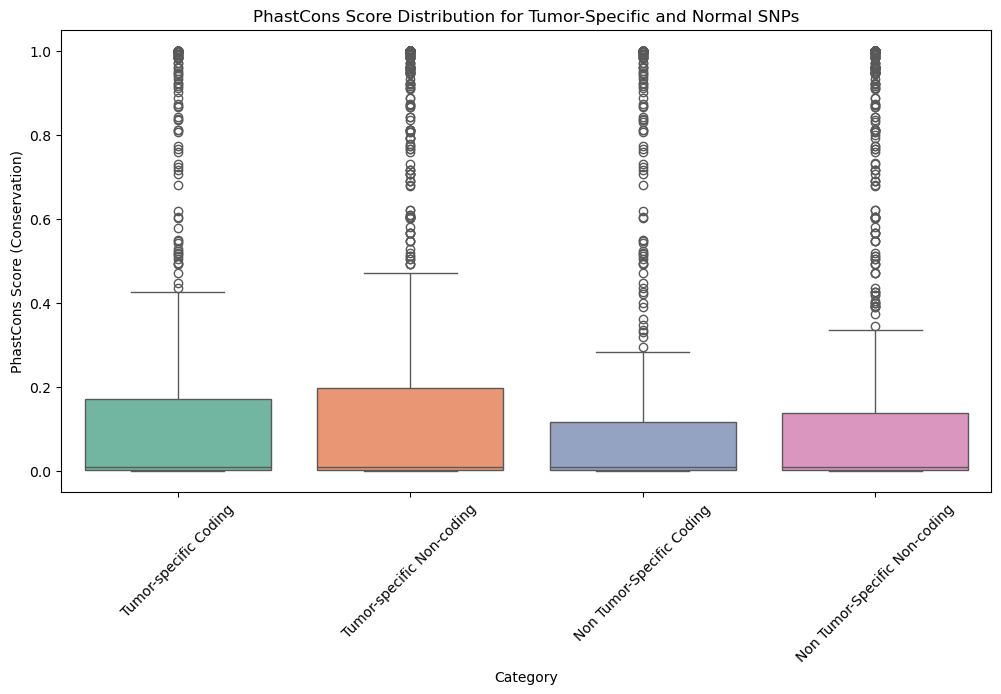

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'category' column to each DataFrame using .loc
tumor_specific_coding.loc[:, 'category'] = 'Tumor-specific Coding'
tumor_specific_non_coding.loc[:, 'category'] = 'Tumor-specific Non-coding'
non_tumor_specific_coding.loc[:, 'category'] = 'Non Tumor-Specific Coding'
non_tumor_specific_non_coding.loc[:, 'category'] = 'Non Tumor-Specific Non-coding'

# Concatenate all the dataframes
combined_data = pd.concat([tumor_specific_coding, tumor_specific_non_coding, non_tumor_specific_coding, non_tumor_specific_non_coding])

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='phastCon', data=combined_data, palette="Set2")

# Add titles and labels
plt.title('PhastCons Score Distribution for Tumor-Specific and Normal SNPs')
plt.xlabel('Category')
plt.ylabel('PhastCons Score (Conservation)')

# Display the plot
plt.xticks(rotation=45)
plt.show()


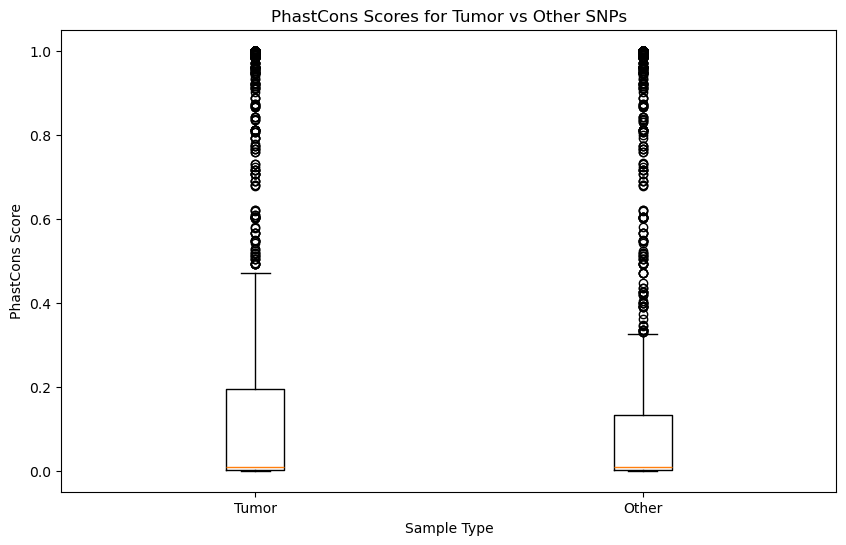

In [14]:
import matplotlib.pyplot as plt

# Define SampleType based on the updated criteria
VisualData['SampleType'] = VisualData['sample'].apply(lambda x: 'Other' if x == 'TLE66_N' else 'Tumor')

# Filter for Tumor Specific and Other SNPs
tumor_specific_coding = VisualData[VisualData['SampleType'] == 'Tumor']
other_coding = VisualData[VisualData['SampleType'] == 'Other']

# Plotting
plt.figure(figsize=(10, 6))

# Create a boxplot to compare PhastCons scores between Tumor and Other samples
plt.boxplot([
    tumor_specific_coding['phastCon'],
    other_coding['phastCon']
], labels=['Tumor', 'Other'])

plt.xlabel('Sample Type')
plt.ylabel('PhastCons Score')
plt.title('PhastCons Scores for Tumor vs Other SNPs')
plt.show()


In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# Calculate summary statistics for Tumor samples
tumor_phastcon = VisualData[VisualData['SampleType'] == 'Tumor']['phastCon']
tumor_mean = tumor_phastcon.mean()
tumor_std = tumor_phastcon.std()

# Calculate summary statistics for Other samples
other_phastcon = VisualData[VisualData['SampleType'] == 'Other']['phastCon']
other_mean = other_phastcon.mean()
other_std = other_phastcon.std()

# Print the statistics
print("Tumor Samples:")
print(f"Mean: {tumor_mean:.4f}")
print(f"Standard Deviation: {tumor_std:.4f}")

print("\nOther Samples:")
print(f"Mean: {other_mean:.4f}")
print(f"Standard Deviation: {other_std:.4f}")


Tumor Samples:
Mean: 0.2134
Standard Deviation: 0.3659

Other Samples:
Mean: 0.2020
Standard Deviation: 0.3571
